#### 작업스케줄링 환경에서 모델을 학습시켜보는 코드입니다.
#### 자세한 사항은 docs/customEnv.md와 scheduler_env/customEnv.py를 참고해주세요

In [1]:
import gymnasium as gym
from gymnasium import spaces
import json
import copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.backends.backend_agg import FigureCanvasAgg
from stable_baselines3.common.env_checker import check_env

from stable_baselines3 import A2C, PPO, DQN
from sb3_contrib import MaskablePPO
from sb3_contrib.common.wrappers import ActionMasker

In [2]:
from scheduler_env.JSSPEnv import JSSPEnv

In [3]:
import warnings
# 특정 경고를 무시하도록 필터를 설정합니다.
warnings.filterwarnings("ignore", category=Warning)

Resource x 8 , Order x 12 환경입니다
다른 환경에서 실험을 진행하고 싶다면 orders, resources 디렉토리를 참고해주세요

혹시 아래에서 오류가 발생할 경우 실행을 한 번 더 눌러주세요

In [4]:
env = JSSPEnv(job_config_path='instances/Jobs/v1-5.json', machine_config_path='instances/Machines/v1-5.json')
check_env(env)

아래는 랜덤으로 스케줄링을 진행한 것 입니다.
각 지표의 의미는 customEnv.py 파일을 참고해주세요

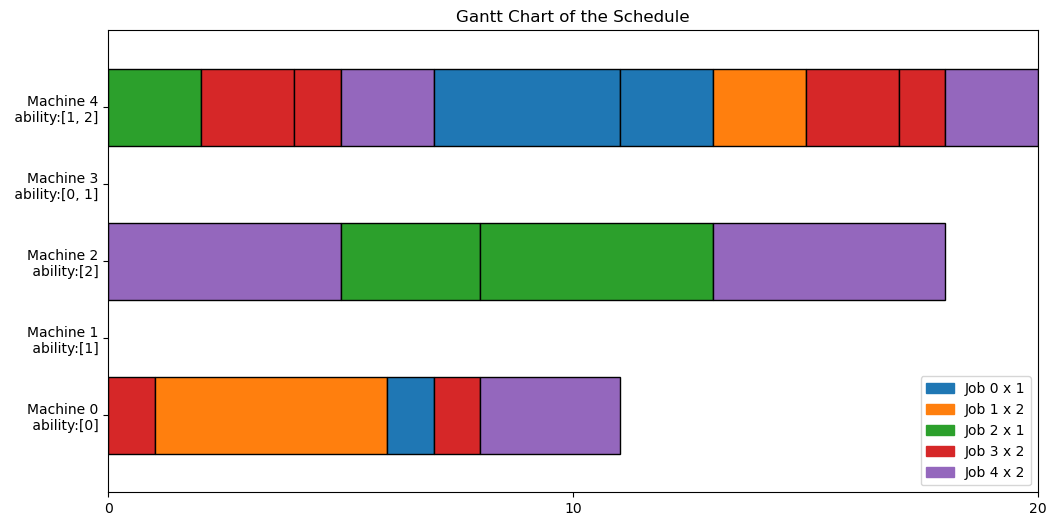

In [5]:
step = 0
obs, info = env.reset()

while True:
    step += 1
    action = env.action_space.sample()
    obs, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated
    if done:
        # print("Goal reached!", "final score=", reward)
        # print('finish_time', info['finish_time'])
        # print('order_density', info['order_density'])
        # print('resource_operation_rate', info['resource_operation_rate'])
        # print('order_deadline', info['order_deadline'])
        # print('order_time_exceeded', info['order_time_exceeded'])
        env.render()
        break

PPO 모델을 해당 환경에서 1,000,000 step 만큼 학습시킵니다

In [6]:
model = PPO('MultiInputPolicy', env, verbose=1, device='mps').learn(1000000)

Using mps device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 147      |
|    ep_rew_mean     | 28.7     |
| time/              |          |
|    fps             | 164      |
|    iterations      | 1        |
|    time_elapsed    | 12       |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 151         |
|    ep_rew_mean          | 31.1        |
| time/                   |             |
|    fps                  | 131         |
|    iterations           | 2           |
|    time_elapsed         | 31          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.018167362 |
|    clip_fraction        | 0.096       |
|    clip_range           | 0.2         |
|    entropy_loss   

Goal reached! final score= 0.05405405405405406
{'repetition': array([1, 2, 1, 2, 2]), 'makespan': 37, 'utilization': [0.0, 0.0, 0.0, 0.0, 0.2702702702702703], 'scheduled_ops': [[], [], [], [], [OP6 - Job2, 2, 2, 0, 2, OP7 - Job2, 2, 3, 2, 5, OP8 - Job2, 2, 5, 5, 10]], 'job_infos': [[Job 0], [Job 1, Job 1], [Job 2], [Job 3, Job 3], [Job 4, Job 4]]}


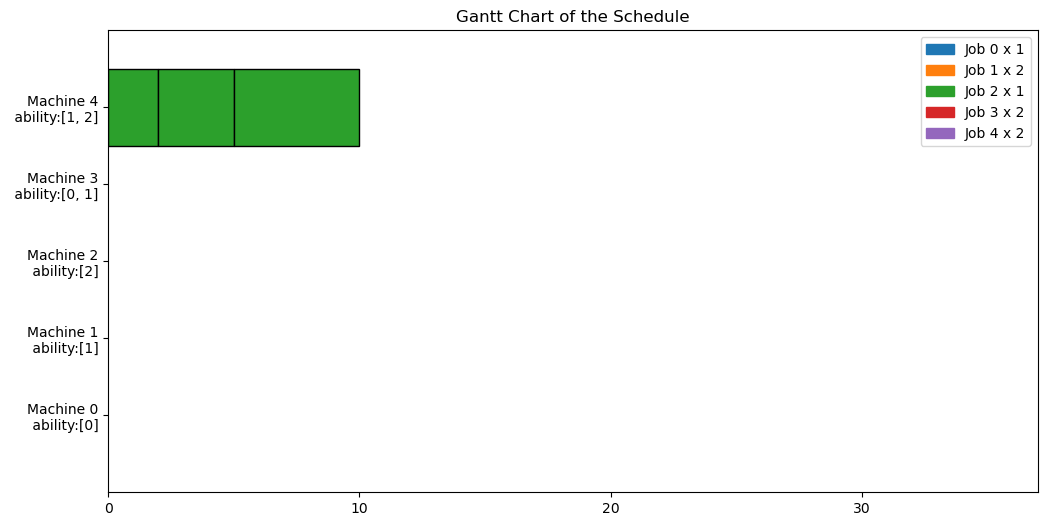

In [9]:
obs, info = env.reset()
done = False
while True:
    action, _ = model.predict(obs, deterministic = False)
    obs, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated
    if done:
        print("Goal reached!", "final score=", reward)
        print(info)
        env.render()
        break

In [ ]:
model.save("PPO_1,000,000_v2")